# With this notebook we will answer the following queries using the Kaggle Goodreads-books dataset 
1. Which authors wrote the most books (peek into the top 10)?
2. Who are the top 10 highly rated and the bottom 5 poorly rated authors?
3. Did the books with more text reviews receive higher ratings?
4. Did the ratings for Harry Potter series follow a trend?
5. How are books distributed across languages?

## Load the dataset view it's shape

In [1]:
#All imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the csv file as Pandas dataframe and check its shape
#Note the warning below: The data contains few erroneous rows that have extra values in its 11th column;
#read_csv function skips these erroneous cases from our dataframe df.
#The original csv file
df = pd.read_csv("books.csv",  error_bad_lines = False)
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))
df.head()

The data contains 13714 Rows and 10 Columns


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


## 1. Which authors wrote the most books (peek into the top 10)?
### 1.a. Agatha Christie, Stephen King and Orson Scott Card	 top the list

In [6]:
#Number of authors
allAuthors = df.authors.unique()
fig, ax = plt.subplots()
y_pos = np.arange(len(allAuthors))

print(len(allAuthors))

top10Authors = df[['authors', 'title']].groupby(['authors']).count()
top10Authors = top10Authors.sort_values(by=['title'], ascending=True)
top10Authors = top10Authors.tail(10)
top10Authors

7600


,title
authors,
J.R.R. Tolkien,31
Dan Simmons,32
Margaret Weis-Tracy Hickman,33
Piers Anthony,34
Terry Brooks,40
P.G. Wodehouse,42
Rumiko Takahashi,46
Orson Scott Card,48
Stephen King,66


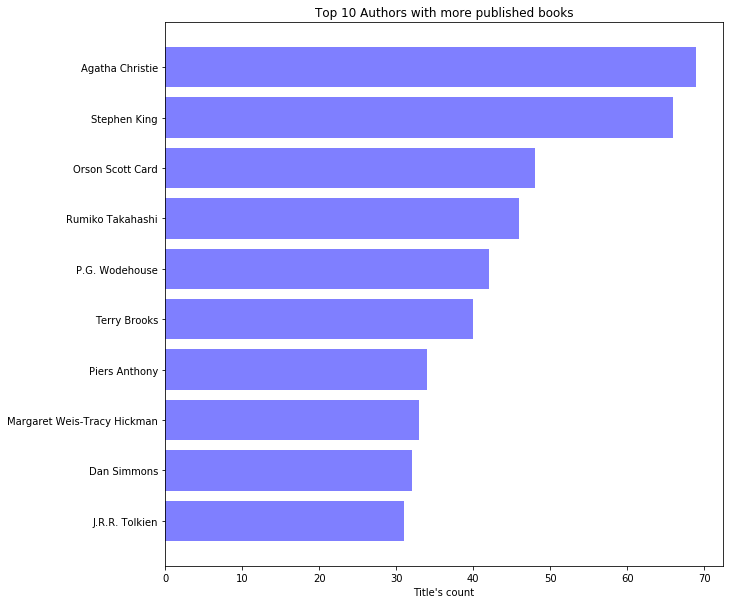

In [8]:
plt.figure(figsize=(10, 10))
y_NoTitles = top10Authors['title']
plt.barh(top10Authors.index.values, y_NoTitles, 0.8, align='center', alpha=0.5, color = 'blue')
plt.xlabel('Title\'s count')
plt.title('Top 10 Authors with more published books')
plt.yticks(top10Authors.index.values, top10Authors.index.values)
plt.show()

## 2. Who are the top 10 highly rated and the bottom 5 poorly rated authors?
### 2.a. The graphs below clearly show the Top 10 and Bottom 5 rated authors

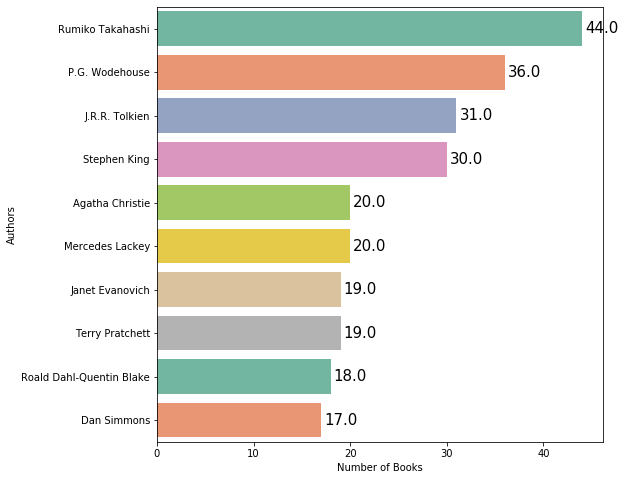

In [9]:
GoodRating = 4
GoodRatedAuthors = df[df['average_rating']>=GoodRating]
GoodRatedAuthors = GoodRatedAuthors.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(8,8))
ax = sns.barplot(GoodRatedAuthors['title'], GoodRatedAuthors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
    
plt.show()

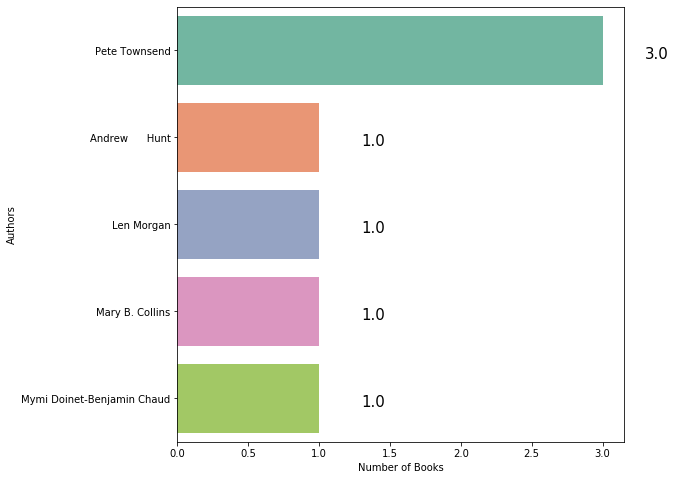

In [10]:
BadRating = 2
BadRatedAuthors = df[df['average_rating'] <= BadRating]
BadRatedAuthors = BadRatedAuthors.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(5).set_index('authors')
plt.figure(figsize=(8,8))
ax = sns.barplot(BadRatedAuthors['title'], BadRatedAuthors.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

## To explore if books with more text reviews receive higher ratings, let us first check for any correlated variables in the dataset
1. ratings_count and text_reviews_count are highly correlated with Correlation Coefficient O.86
2. We would rather want to explore if ratings_count and text_reviews_count have influence on average_rating

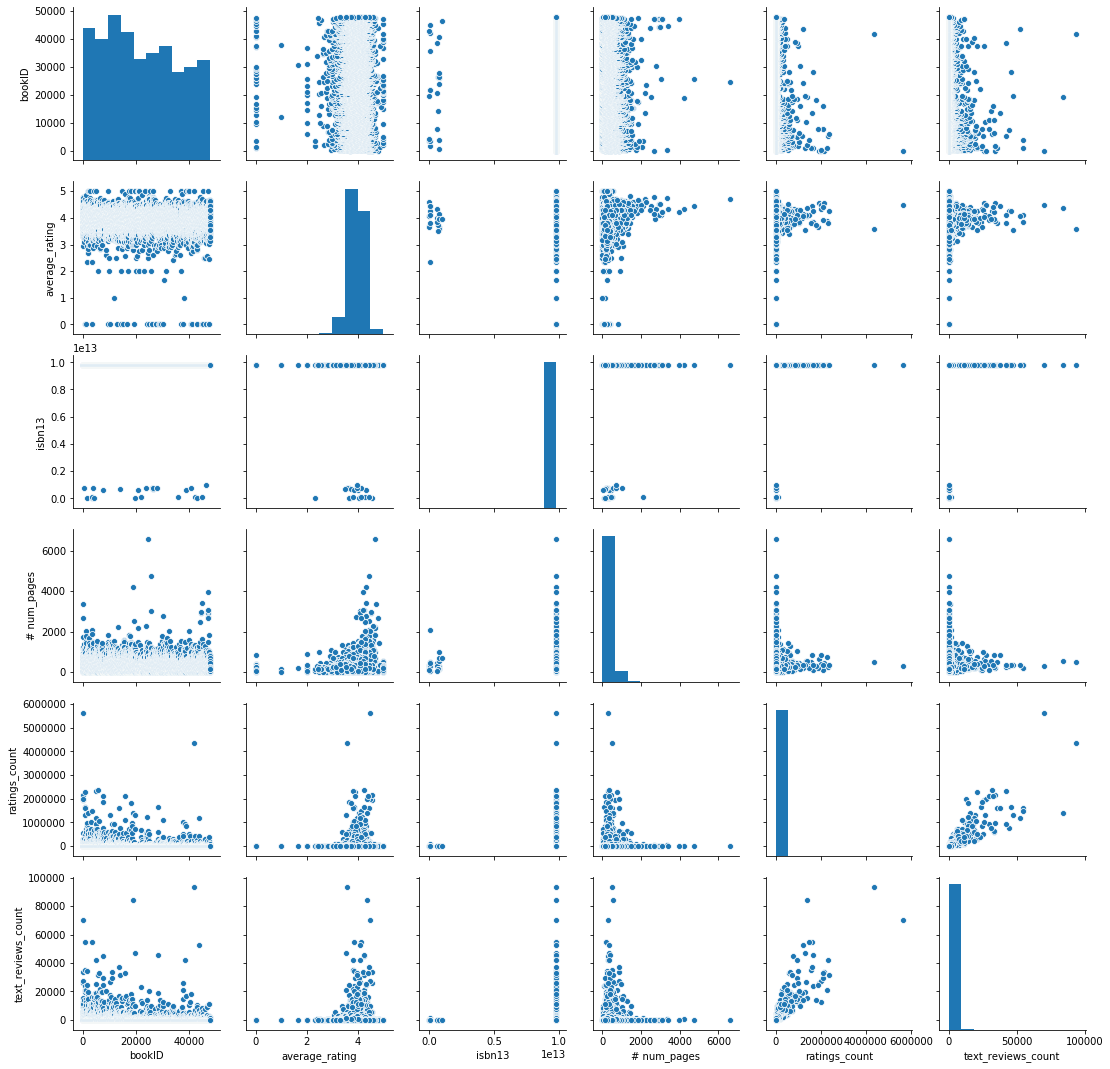

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
corr = df.corr()
corr

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
bookID,1.000000,-0.042510,-0.001610,-0.012872,-0.081236,-0.087670
average_rating,-0.042510,1.000000,0.000453,0.167388,0.041234,0.036695
isbn13,-0.001610,0.000453,1.000000,-0.011723,0.004835,0.007260
# num_pages,-0.012872,0.167388,-0.011723,1.000000,0.028408,0.034171
ratings_count,-0.081236,0.041234,0.004835,0.028408,1.000000,0.863467
text_reviews_count,-0.087670,0.036695,0.007260,0.034171,0.863467,1.000000


<Figure size 360x360 with 0 Axes>

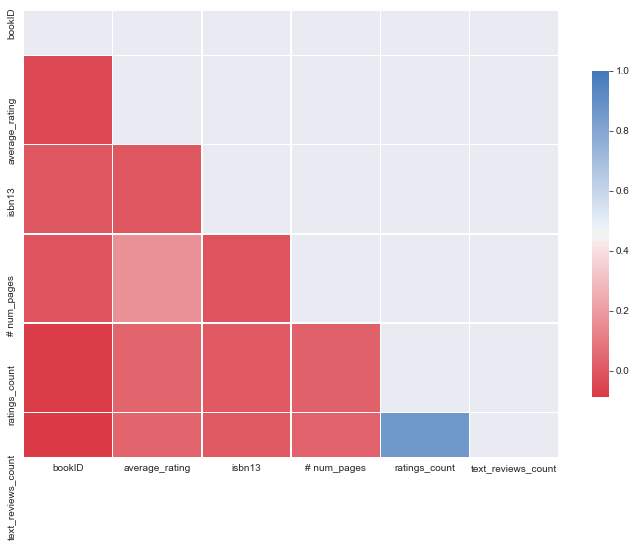

In [13]:
plt.figure(figsize=(5,5))

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'dark')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

plt.show()

## 3.a. Did the books with more text reviews receive higher ratings?
#### Yes (The plot below clearly shows that Ratings and Text review counts are correlated)

c:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


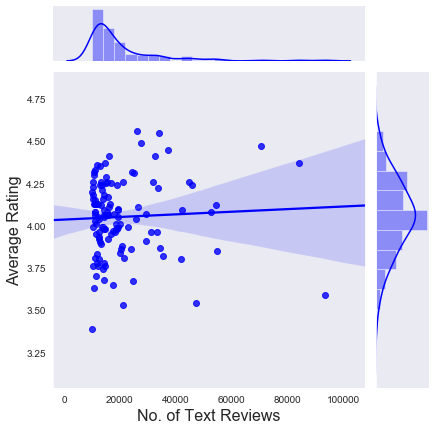

In [14]:
data_TextReviewsGreaterThan10K = df[df['text_reviews_count'] > 10000]

ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = data_TextReviewsGreaterThan10K, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Average Rating", fontsize=16)
plt.show()

## 3.b. Did the books with more reviews receive higher ratings? 
#### Yes (The plot below clearly shows that Ratings and Review counts are correlated)

c:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


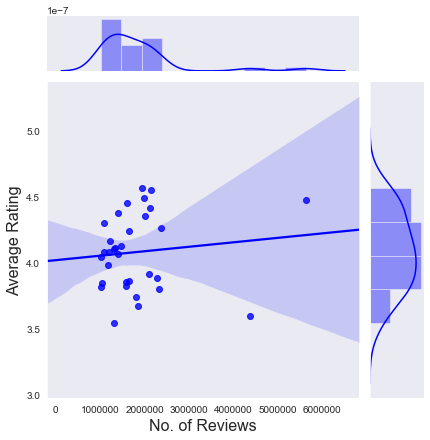

In [15]:
data_ReviewsGreaterThan1Million = df[df['ratings_count'] > 1000000]
ax = sns.jointplot(x="ratings_count", y="average_rating", data = data_ReviewsGreaterThan1Million, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Reviews", "Average Rating",fontsize=16)
plt.show()

## Did the ratings for Harry Potter series follow a trend?
### Ther is not really a upward or downward trend, the ratings for the six Harry Potter books in the list were all above 4.4 and stayed around that number. Looks like all the books were equally liked by the readers. Kudos to J.K.Rowling-Mary GrandPré.

c:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


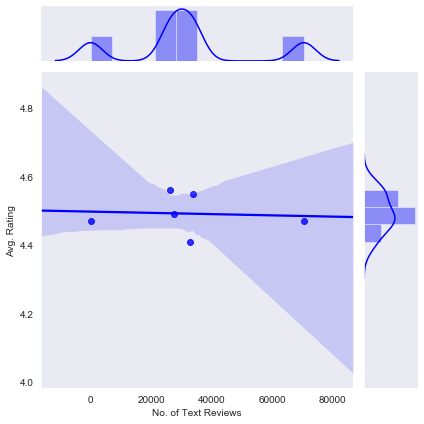

,title,authors,isbn13,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,9780439785969,4.56,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,9780439358071,4.49,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780439554930,4.47,320,5629932,70390
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,9780439655484,4.55,435,2149872,33964
5300,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,9780439064866,4.41,341,2115562,32694
10540,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780786222728,4.47,424,132,12


In [16]:
author_df = df[df['authors']=='J.K. Rowling-Mary GrandPré']
author_df = author_df[author_df['language_code']=='eng']
author_df = author_df[['title', 'authors', 'isbn13', 'average_rating', '# num_pages', 'ratings_count', 'text_reviews_count']]

author_df2 = author_df[~(author_df['title'].str.contains('Boxed Set'))]
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = author_df2, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Avg. Rating")
plt.show()
author_df2

In [17]:
#Extract the Volume number of the book using regular expression
author_df2['Volume'] = author_df2.title.str.extract("\((.*?)\)", expand=True)

c:\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
author_df2 = author_df2.sort_values(by=['Volume'])
author_df2

,title,authors,isbn13,average_rating,# num_pages,ratings_count,text_reviews_count,Volume
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780439554930,4.47,320,5629932,70390,Harry Potter #1
10540,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,9780786222728,4.47,424,132,12,Harry Potter #1
5300,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,9780439064866,4.41,341,2115562,32694,Harry Potter #2
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,9780439655484,4.55,435,2149872,33964,Harry Potter #3
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,9780439358071,4.49,870,1996446,27613,Harry Potter #5
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,9780439785969,4.56,652,1944099,26249,Harry Potter #6


c:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


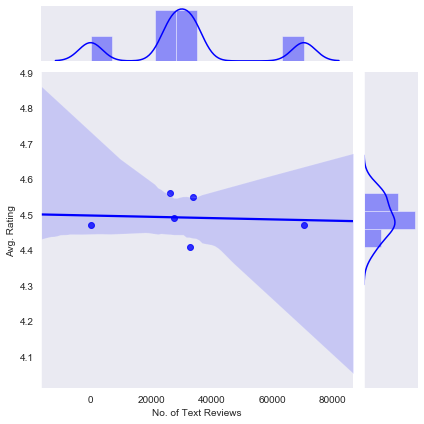

In [19]:
ax = sns.jointplot(x="text_reviews_count", y="average_rating", data = author_df2, kind = 'reg', color = 'blue')
ax.set_axis_labels("No. of Text Reviews", "Avg. Rating")
plt.show()

## How books distributed across languages?
### Clearly there are more English books than other languages.
1. English - 77.2%
2. English-US - 12.4%
3. Spanish - 3.1%
4. English-GB - 2.5%
5. German - 1.7%

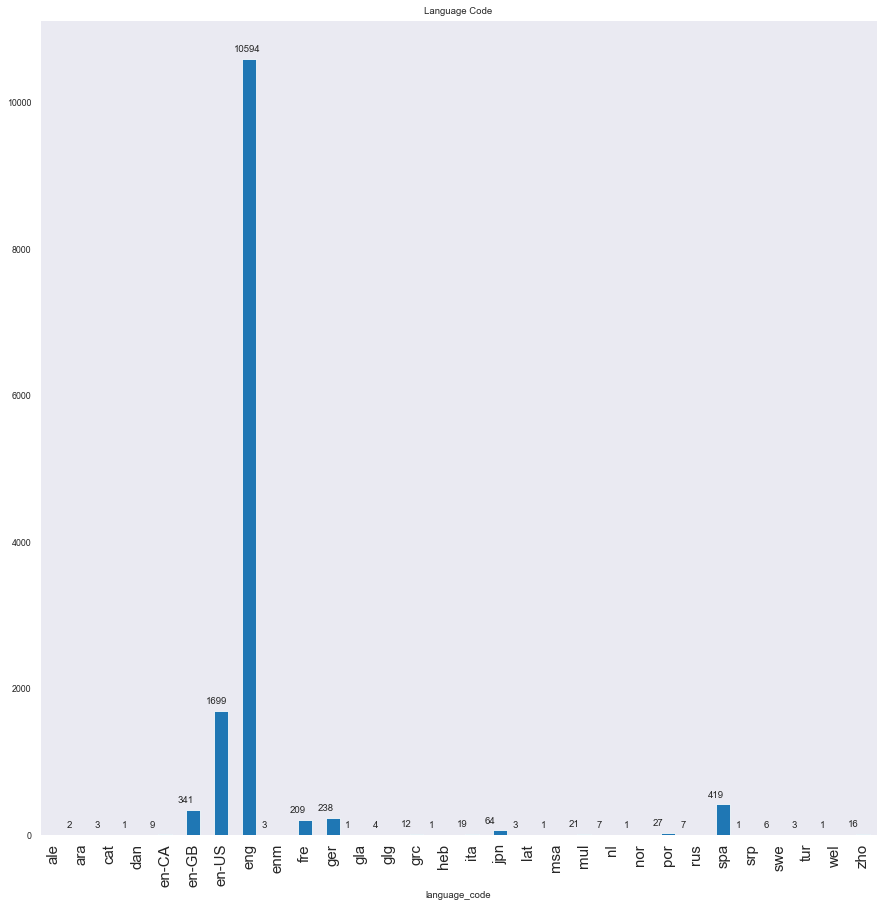

In [20]:
sns.set_context('paper')
plt.figure(figsize=(15,15))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))
plt.show()

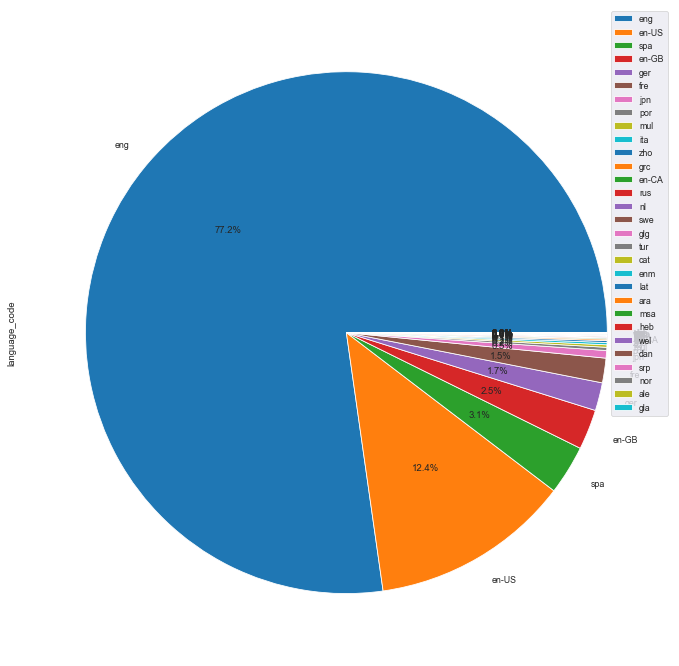

In [21]:
df['language_code'].value_counts().plot(kind = 'pie', figsize=(12, 12), autopct='%1.1f%%',).legend()
plt.show()

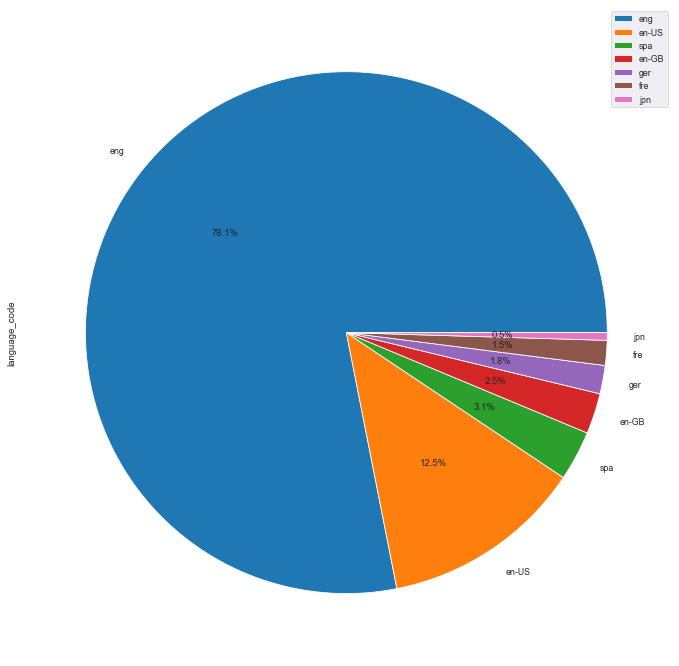

In [22]:
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(12, 12),autopct='%1.1f%%',).legend()
plt.show()